Enter the keyword to be analyzed : india
Enter the number of tweets to be analyzed : 100
 
Status(_api=<tweepy.api.API object at 0x7fc88d06a710>, _json={'created_at': 'Wed Oct 09 09:03:26 +0000 2019', 'id': 1181857691620270080, 'id_str': '1181857691620270080', 'text': "RT @CynthiaDRitchie: IMO a partial rewrite is needed: \n\nIt's time for #India to lift these restrictions and **cooperate with its neighbor,…", 'truncated': False, 'entities': {'hashtags': [{'text': 'India', 'indices': [70, 76]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CynthiaDRitchie', 'name': 'Cynthia D. Ritchie', 'id': 18730534, 'id_str': '18730534', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'us

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/etl/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


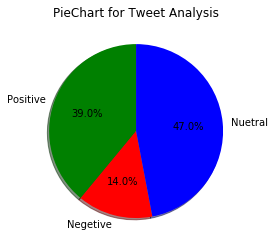

In [2]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
from nltk.stem.porter import *
from collections import Counter
import pandas as pd
import time
from operator import itemgetter 
from itertools import chain 
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

class TwitterClient(object): 
	''' 
	Generic Twitter Class for sentiment analysis. 
	'''

	def __init__(self): 
		''' 
		Class constructor or initialization method. 
		'''
		# keys and tokens from the Twitter Dev Console 
		consumer_key = 'JTrrb24OiDSCaBfqrPuvv9Xl2'
		consumer_secret = 'gcbR7NkdpJSfOWvDzLpgA73KT9CxY46NGJzErCIPE5noCdTEoG'
		access_token = '1121603288560836609-AvlTRUvmeznTcVBWelIXonH1Gbc8Bq'
		access_token_secret = 'CKkFhuskaNixMc23JmX3lyLsTO9nGoPKkWkyRUiDjU25M'

		# attempt authentication 
		try: 
			# create OAuthHandler object 
			self.auth = OAuthHandler(consumer_key, consumer_secret) 
			# set access token and secret 
			self.auth.set_access_token(access_token, access_token_secret) 
			# create tweepy API object to fetch tweets 
			self.api = tweepy.API(self.auth, proxy = "https://172.28.137.11:3128") 
			#self.api = tweepy.API(self.auth) 
            #self.api.wait_on_rate_limit = True;
			#self.api.wait_on_rate_limit_notify = True;
		except: 
			print("Error: Authentication Failed") 

	def clean_tweet(self, tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return  ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

	def get_tweet_sentiment(self, tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(self.clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0: 
			return 'positive'
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'

	def get_tweets(self, query, count = 10): 
		''' 
		Main function to fetch tweets and parse them. 
		'''
		# empty list to store parsed tweets 
		tweets = [] 


		try: 
			# call twitter api to fetch tweets 
			#fetched_tweets = self.api.search(q = query, count = count) 


			# parsing tweets one by one 
			#for tweet in tweepy.Cursor(self.api.search, q=query, tweet_mode='extended').items(count): 
			for tweet in tweepy.Cursor(self.api.search, q=query).items(count): 
			#for tweet in fetched_tweets: 
				# empty dictionary to store required params of a tweet 
				parsed_tweet = {} 

				# saving text of tweet 
				parsed_tweet['text'] = tweet.text
				# saving sentiment of tweet 
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                
				parsed_tweet['enriched'] = self.clean_tweet(tweet.text)
                
				#print(parsed_tweet['text'])
				#print("self.get_tweet_sentiment(tweet.text) : "+self.get_tweet_sentiment(tweet.text))
				'''
				# appending parsed tweet to tweets list 
				if tweet.retweet_count > 0: 
					# if tweet has retweets, ensure that it is appended only once 
					if parsed_tweet not in tweets: 
						tweets.append(parsed_tweet)
				else: 
					tweets.append(parsed_tweet)
				'''
				tweets.append(parsed_tweet)
			# return parsed tweets 
			print(tweet)
			#print("Total number of records : " + str(len(tweets)))
			return tweets 

		except tweepy.TweepError as e: 
			# print error (if any) 
			print("Error : " + str(e)) 
			#exit()

def main(): 
    
	# creating object of TwitterClient Class 
	api = TwitterClient()
    
	query_input = input("Enter the keyword to be analyzed : ")
	count_input = int(input("Enter the number of tweets to be analyzed : "))
	print(" ")
	# calling function to get tweets 
	#tweets = api.get_tweets(query = 'realDonaldTrump', count = 200)
	tweets = api.get_tweets(query = query_input, count = count_input) 

	# picking positive tweets from tweets 
	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
	# percentage of positive tweets 
	print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
	# picking negative tweets from tweets 
	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
	# percentage of negative tweets 
	print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
	# percentage of neutral tweets 
	print("Neutral tweets percentage: {} % ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

	ht=''
	all_words = ''
	hashtags = []    
	for tweet in tweets[:]:
		ht = re.findall(r"#(\w+)", tweet['enriched'])
		hashtags.append(ht)        
		all_words = all_words + ' ' + tweet['enriched']
    
	all_words = all_words.lower()
	all_ptweets_list = []
	all_ptweets_list = [ tweet['enriched'] for tweet in tweets if tweet['sentiment'] == 'positive']
	all_ptweets_list = (' '.join(all_ptweets_list)).split()

	all_ptweets_mc_list = []
	for word, count in Counter(all_ptweets_list).most_common(100):
		all_ptweets_mc_list.append(word)
    
	all_ptweets_mc = ''

	hashtags_pos = []
	for word in all_ptweets_list:
		ht = re.findall(r"#(\w+)", word)
		hashtags_pos.append(ht)
		if word in all_ptweets_mc_list:
			all_ptweets_mc = all_ptweets_mc + ' ' + word

    #negetive tweets most common words
	all_ntweets_list = []
	all_ntweets_list = [ tweet['enriched'] for tweet in tweets if tweet['sentiment'] == 'negative']
	all_ntweets_list = (' '.join(all_ntweets_list)).split()

	all_ntweets_mc_list = []
	for word, count in Counter(all_ntweets_list).most_common(100):
		all_ntweets_mc_list.append(word)
    
	all_ntweets_mc = ''
	hashtags_neg = []
	for word in all_ntweets_list:
		ht = re.findall(r"#(\w+)", word)
		hashtags_neg.append(ht)
		if word in all_ntweets_mc_list:
			all_ntweets_mc = all_ntweets_mc + ' ' + word
	#print(all_ntweets_mc)

	#print("all_words : " + all_words)
	tweet_perc = []
	tweet_perc.append(len(ptweets))
	tweet_perc.append(len(ntweets))
	tweet_perc.append(len(tweets) - len(ntweets) - len(ptweets))
	lables = ['Positive', 'Negetive', 'Nuetral']
	colors = ['g', 'r', 'b']
	plt.title('PieChart for Tweet Analysis')
	plt.pie(tweet_perc, labels=lables, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
	#plt.show()
	#print("ptweets", len(ptweets))
	#print("ntweets", len(ntweets))
	#print("tweets", len(tweets))
	#stopwords = list(STOPWORDS) 
	stop = stopwords.words('english') + ['rt', 'RT', 'the', 'The', 'will', 'https', "we're", "it's", '&amp', 'make', 'bring', 'much', ]
	#stop = stopwords + ['rt', 'RT', 'the', 'The', 'will', 'https', '']

	#WordCloud for all words
	wordcloud = WordCloud(width = 800, height = 800,stopwords = stop, min_font_size = 10).generate(all_words) 
	plt.figure(figsize = (8, 8), facecolor = None) 
	plt.imshow(wordcloud, interpolation="bilinear") 
	plt.axis("off") 
	plt.tight_layout(pad = 0) 
	plt.title('WordCloud for ALL Comments')
	plt.show() 
    
	#print("WordCloud for Positive Comments ------------>")
	wordcloud = WordCloud(width = 800, height = 800,stopwords = stop, min_font_size = 10).generate(all_ptweets_mc) 
  
# plot the WordCloud image                        
	plt.figure(figsize = (8, 8), facecolor = None) 
	plt.imshow(wordcloud, interpolation="bilinear") 
	plt.axis("off") 
	plt.tight_layout(pad = 0) 
	plt.title('WordCloud for Positive Comments')
	plt.show() 


	#print("WordCloud for Negetive Comments ------------>")
	wordcloud = WordCloud(width = 800, height = 800,stopwords = stop, min_font_size = 10).generate(all_ntweets_mc) 
	plt.figure(figsize = (8, 8), facecolor = None) 
	plt.imshow(wordcloud, interpolation="bilinear") 
	plt.axis("off") 
	plt.tight_layout(pad = 0) 
	plt.title('WordCloud for Negetive Comments')
	plt.show()
    
    #Horizontal bar chart for most common words
	all_words_without_stop_wd = ''
	for word in all_words.split():
		if word.lower() not in stop and len(word) > 3:
			all_words_without_stop_wd = all_words_without_stop_wd + ' ' + word#stemmer.stem(word)
	all_words_without_stop_wd = re.sub(r"#(\w+)",'', all_words_without_stop_wd) # remove hashtags
	df = pd.DataFrame(sorted(Counter(all_words_without_stop_wd.split()).most_common(15),key = itemgetter(1)), columns = ['word', 'count'])
	df.plot.barh(x='word', title='Most Common Words')

	all_pos_words_without_stop_wd = ''
	for word in all_ptweets_list:
		if word.lower() not in stop and len(word) > 3:
			all_pos_words_without_stop_wd = all_pos_words_without_stop_wd + ' ' + word.lower()#stemmer.stem(word)
	all_pos_words_without_stop_wd = re.sub(r"#(\w+)",'', all_pos_words_without_stop_wd) # remove hashtags
	df = pd.DataFrame(sorted(Counter(all_pos_words_without_stop_wd.split()).most_common(15),key = itemgetter(1)), columns = ['word', 'count'])
	df.plot.barh(x='word', title='Most Postive Words', color=['green'])

	all_neg_words_without_stop_wd = ''
	for word in all_ntweets_list:
		if word.lower() not in stop and len(word) > 3:
			all_neg_words_without_stop_wd = all_neg_words_without_stop_wd + ' ' + word.lower()#stemmer.stem(word)
	all_neg_words_without_stop_wd = re.sub(r"#(\w+)",'', all_neg_words_without_stop_wd) # remove hashtags
	df = pd.DataFrame(sorted(Counter(all_neg_words_without_stop_wd.split()).most_common(15),key = itemgetter(1)), columns = ['word', 'count'])
	df.plot.barh(x='word', title='Most Negetive Words', color=['red'])
    
	print("")
    #Trend analysis
	if len(Counter(sum(hashtags, [])).most_common(15)) > 0 :
		#print("Hashtag trends with Positive Tweets ------------>")
		df = pd.DataFrame(Counter(sum(hashtags, [])).most_common(15), columns = ['Hashtags', 'Count'])
		df.plot.bar(x='Hashtags', y='Count', title='Trends Analysis')   
	else:
		print("No Hashtags associated with Tweets")
        
	#print(Counter(sum(hashtags_pos, [])).most_common(10))
	if len(Counter(sum(hashtags_pos, [])).most_common(15)) > 0 :
		#print("Hashtag trends with Positive Tweets ------------>")
		df = pd.DataFrame(Counter(sum(hashtags_pos, [])).most_common(15), columns = ['Hashtags', 'Count'])
		df.plot.bar(x='Hashtags', y='Count', title='Trends with Positive Tweets')   
	else:
		print("No Hashtags associated with Positive Tweets")    

	#print(Counter(sum(hashtags_neg, [])).most_common(10))
	if(len(Counter(sum(hashtags_neg, [])))) > 0:
		#print("Hashtag trends with Negetive Tweets ------------>")
		df = pd.DataFrame(Counter(sum(hashtags_neg, [])).most_common(15), columns = ['Hashtags', 'Count'])
		df.plot.bar(x='Hashtags', y='Count', title='Trends with Negetive Tweets')   
	else:
		print("No Hashtags associated with Negetive Tweets")
        
	# printing first 5 positive tweets 
	print("\n\nPositive tweets:") 
	for tweet in ptweets[:10]: 
		print(tweet['text']) 

	# printing first 5 negative tweets 
	print("\n\nNegative tweets:")   
	for tweet in ntweets[:10]: 
		print(tweet['text']) 


if __name__ == "__main__": 
	# calling main function 
	main() 


